![terrainbento logo](../images/terrainbento_logo.png)


# Introduction to the terrainbento output writers.


## Overview
This tutorial shows example usage of the terrainbento output writers. For comprehensive information about all options and defaults, refer to the [documentation](http://terrainbento.readthedocs.io/en/latest/). 

## Prerequisites
This tutorial assumes you have at least skimmed the [terrainbento manuscript](https://www.geosci-model-dev.net/12/1267/2019/) and worked through the [Introduction to terrainbento](http://localhost:8888/notebooks/example_usage/Introduction_to_terrainbento.ipynb) tutorial.


### terrainbento output writers

By default terrainbento will save a [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) file at equal intervals specified by the ``output_interval`` parameter. For many applications it may be sufficient to run a model, save output, and then open the stack of NetCDFs for postprocessing (we recommend [xarray](http://xarray.pydata.org/en/stable/) and [holoviews](http://holoviews.org) for opening, analyzing, and plotting stacks of NetCDFs in python). 

If in your application, you want to have additional output written at the ``output_interval`` intervals, you can pass any number of functions or classes that write this ouput to terrainbento. These functions and classes are called **output writers**. There is no limit to what you can do with the output writers. You could use them to make plots to turn into an animation, write diagnostic information about model run time, or calculate an objective function value over time. 

To make the output writers support as many possible use cases, terrainbento was designed to take any number of functions or classes as output writers. 

### Reference material
If you are not familiar with user defined python functions, consider reviewing [this tutorial](https://www.datacamp.com/community/tutorials/functions-python-tutorial#udf). If you are not familiar with user defined python classes, consider referring to [this tutorial](https://www.digitalocean.com/community/tutorials/how-to-construct-classes-and-define-objects-in-python-3).


### Example Usage

To begin, we will import the required python modules. 

In [1]:
import numpy as np
np.random.seed(42)

import os
import glob
# the glob module is used to retrieve files/pathnames matching a specified pattern

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from landlab.components import DrainageDensity
from landlab import imshow_grid
import imageio

from terrainbento import Basic

import holoviews as hv
hv.notebook_extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

We begin by creating an example user defined output writer function. When a terrainbento model runs the `OutputWriter` function, it will pass the model instance to the output writer. Thus the output writer function must be able to make all required calculations and plots based on the model instance. It is almost always the case that a user will want to write some sort of output -- typically a text file or plot -- each time the output writer is run. 

A user has the option of appending the output writer output to a file or using the model attributes `model.model_time` or `model.iteration` in the output file name to distinguish it from other files.  



In [2]:
def name_of_output_writer_function(model):
    # put lines of code here that use the model object to calculate outputs
    # for example, mean elevation
    val = model.z.mean()

    # write output, option 1: unique files per timestep
    with open('name_of_file.' + str(int(model.iteration)) + '.txt', 'w') as f:
        f.write(str(val))

    # write output, option 2: append values to same file
    with open('name_of_file.txt', 'a') as f:
        f.write(
            str(model.iteration) + ', ' + str(model.model_time) + ', ' +
            str(val) + '\n')

Here we will define an output writer called `write_drainage_density`. Not surprisingly, it calculates and writes out the drainage density of a model domain. The **DrainageDensity** component has two options for identifying where channels are located -- either a user-specified channel mask or a slope-area threshold. We will use this latter option. [See also](https://landlab.readthedocs.io/en/master/reference/components/drainage_density.html)

In [3]:
def write_drainage_density(model):
    dd = DrainageDensity(model.grid,
                         area_coefficient=0.1,
                         slope_coefficient=1.0,
                         area_exponent=0.5,
                         slope_exponent=0.6,
                         channelization_threshold=0.35)
    mean_drainage_density = dd.calculate_drainage_density()
    if np.isinf(mean_drainage_density):
        mean_drainage_density = 0.0
    fname = 'drainage_density.txt'
    if os.path.exists(fname) is False:
        with open(fname, 'w') as f:
            f.write('model_time,drainage_density\n')

    with open(fname, 'a') as f:
        f.write(
            str(model.model_time) + ', ' + str(mean_drainage_density) + '\n')

    del dd

Next we construct the parameter dictionary we will use to run the model. 

In [4]:
basic_params = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 2e5
    },

    # Create the Grid
    "grid": {
        "RasterModelGrid": [
            (25, 40),
            {
                "xy_spacing": 40
            },
            {
                "fields": {
                    "node": {
                        "topographic__elevation": {
                            "random": [{
                                "where": "CORE_NODE"
                            }]
                        }
                    }
                }
            },
        ]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "NotCoreNodeBaselevelHandler": {
            "modify_core_nodes": True,
            "lowering_rate": -0.0005
        }
    },
    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "model_basic_output_intro_ow1",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.001,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0.1,
}

Unline the boundary handlers described in [this tutorial](http://localhost:8888/notebooks/example_usage/introduction_to_boundary_conditions.ipynb), we pass the output writer to terrainbento as a keyword argument. 

After instantiating the model, we run it. 

In [5]:
basic = Basic.from_dict(basic_params,
                        output_writers={"function": [write_drainage_density]})
basic.run()

First we will make a plot of the topography. We have evolved some nice valleys and ridges. 

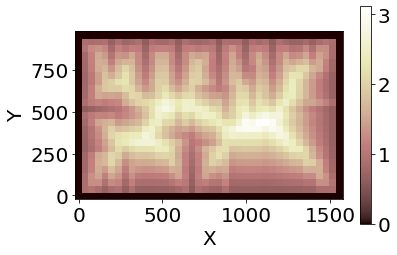

In [6]:
imshow_grid(basic.grid, basic.z)

Now that we've run the model we will compile all of the output into a dataframe and plot it. 

Next we plot the channel mask from the last timestep. It is stored in an at-node grid field called `chanel__mask`.

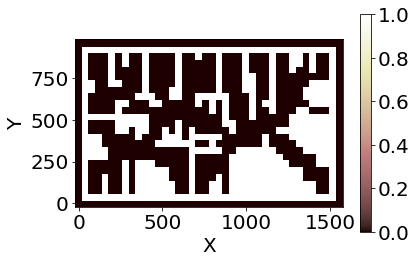

In [7]:
channel__mask = basic.grid.at_node['channel__mask'].astype(int)
imshow_grid(basic.grid, channel__mask)

Our mask identifies the channel areas. 

Next we will read in the output we wrote to the file `drainage_density.txt` using [pandas](https://pandas.pydata.org) and remove the files created by running the model. In your usage you probably won't want to remove these files, but we are doing it so that running the model won't create lots of files in your directory. 

In [8]:
df = pd.read_csv('drainage_density.txt')
basic.remove_output_netcdfs()
os.remove('drainage_density.txt')

We can look at what is inside of the dataframe. 

In [9]:
df.head()

,model_time,drainage_density
0,0.0,0.000000
1,10000.0,0.025289
2,20000.0,0.017452
3,30000.0,0.017452
4,40000.0,0.017452


In [10]:
df.columns

Index(['model_time', 'drainage_density'], dtype='object')

This dataframe shows us the history of drainage density through time. Next we will plot it. 

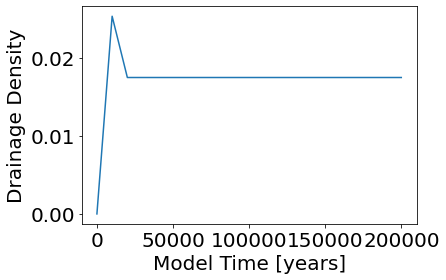

In [11]:
plt.figure()
plt.plot(df.model_time, df.drainage_density)
plt.xlabel('Model Time [years]')
plt.ylabel('Drainage Density')
plt.show()

## Challenge: make a plot of the average elevation of the LEM through time

#### Step 1: Create a function to calculate the average elevation

In [12]:
def write_avg_el(model):
    avg = model.z.mean()    
    
    fname = 'mean_elevation.txt'
    if os.path.exists(fname) is False:
        with open(fname, 'w') as f:
            f.write('model_time,avg\n')

    with open(fname, 'a') as f:
        f.write(
            str(model.model_time) + ', ' + str(avg) + '\n')

    del avg

#### Step 2 run the model 

Next we construct the parameter dictionary we will use to run the model. 

In [23]:
basic_params = {
    # create the Clock.
    "clock": {
        "start": 0,
        "step": 1000,
        "stop": 5e5
    },

    # Create the Grid
    "grid": {
        "RasterModelGrid": [
            (25, 40),
            {
                "xy_spacing": 40
            },
            {
                "fields": {
                    "node": {
                        "topographic__elevation": {
                            "random": [{
                                "where": "CORE_NODE"
                            }]
                        }
                    }
                }
            },
        ]
    },

    # Set up Boundary Handlers
    "boundary_handlers": {
        "NotCoreNodeBaselevelHandler": {
            "modify_core_nodes": True,
            "lowering_rate": -0.0005
        }
    },
    # Parameters that control output.
    "output_interval": 1e4,
    "save_first_timestep": True,
    "output_prefix": "model_basic_output_intro_avg",
    "fields": ["topographic__elevation"],

    # Parameters that control process and rates.
    "water_erodibility": 0.0001,
    "m_sp": 0.5,
    "n_sp": 1.0,
    "regolith_transport_parameter": 0.01,
}

Unline the boundary handlers described in [this tutorial](http://localhost:8888/notebooks/example_usage/introduction_to_boundary_conditions.ipynb), we pass the output writer to terrainbento as a keyword argument. 

After instantiating the model, we run it. 

In [24]:
basic2 = Basic.from_dict(basic_params,
                        output_writers={"function": [write_avg_el]})
basic2.run()

First we will make a plot of the topography. We have evolved some nice valleys and ridges. 

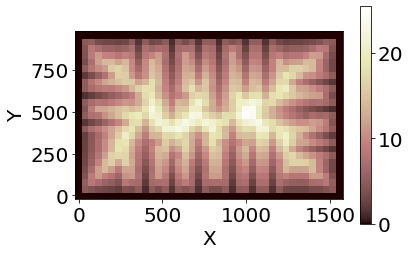

In [25]:
imshow_grid(basic2.grid, basic2.z)

In [26]:
df = pd.read_csv('mean_elevation.txt')
df.head()

,model_time,avg
0,0.0,0.436998
1,10000.0,4.220898
2,20000.0,7.003494
3,30000.0,8.510658
4,40000.0,9.061226


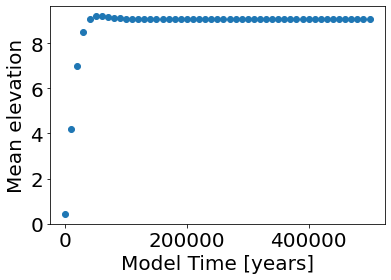

In [27]:
plt.figure()
plt.scatter(df.model_time, df.avg)
plt.xlabel('Model Time [years]')
plt.ylabel('Mean elevation')
plt.show()

In [28]:
ds2 = basic2.to_xarray_dataset(time_unit='years', space_unit='meters')

:HoloMap   [time]
   :Image   [x,y]   (topographic__elevation)
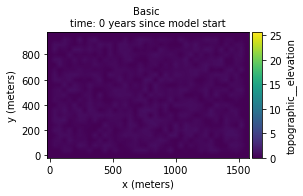
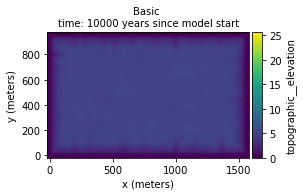
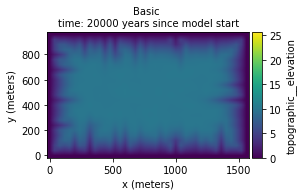
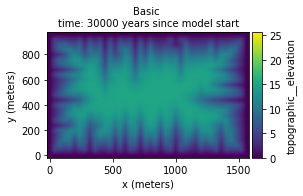
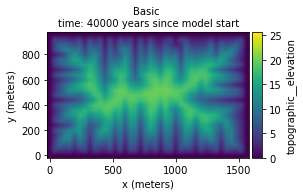
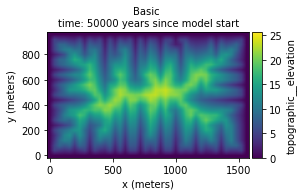
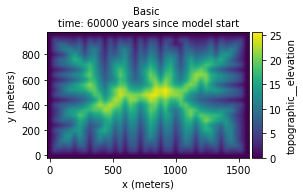
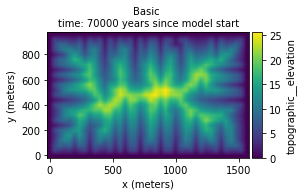
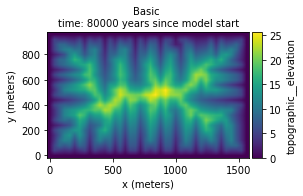
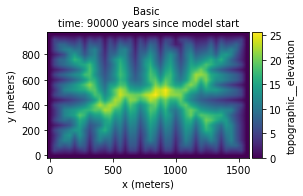
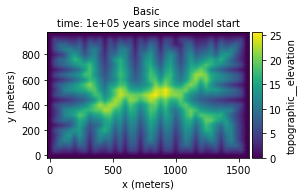
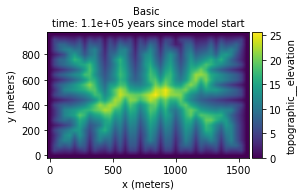
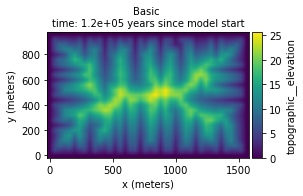
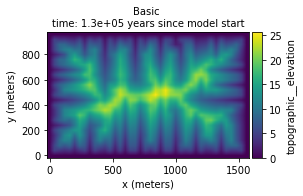
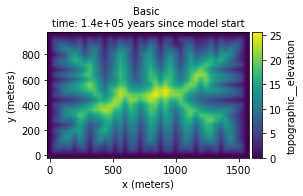
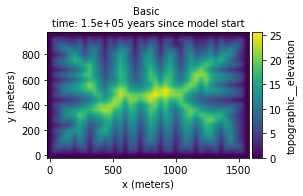
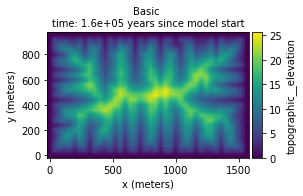
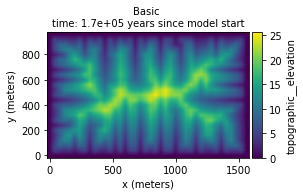
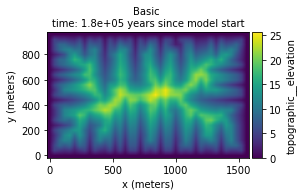
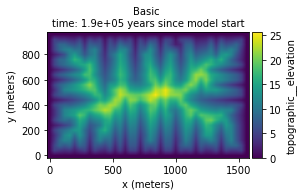
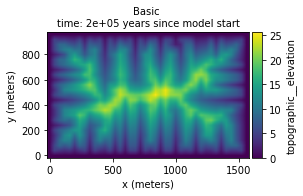
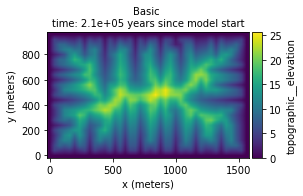
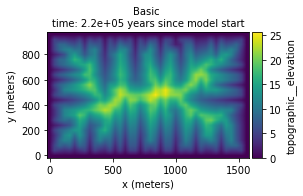
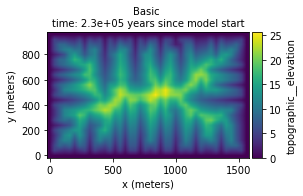
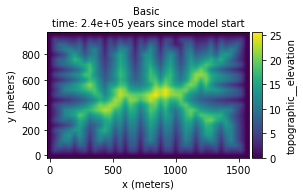
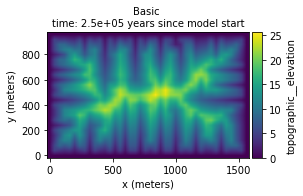
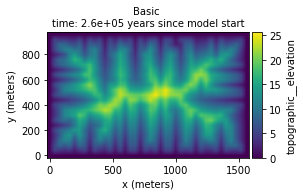
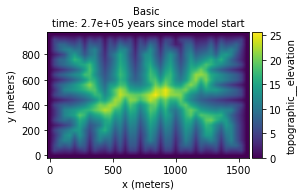
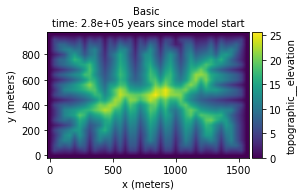
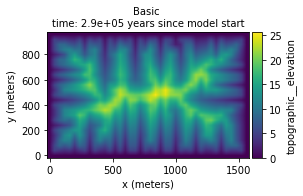
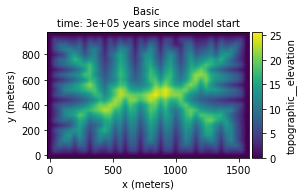
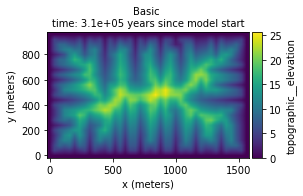
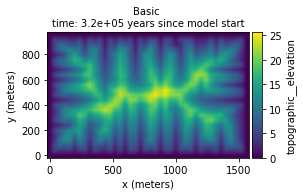
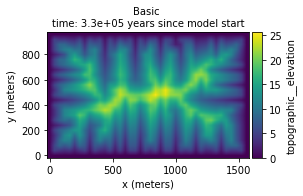
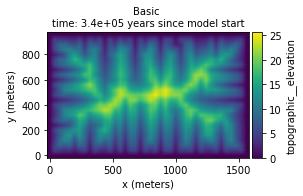
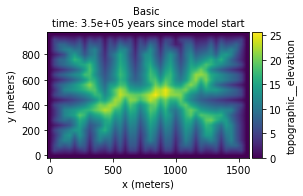
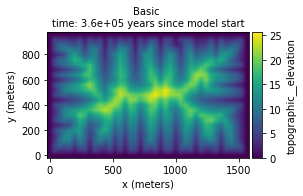
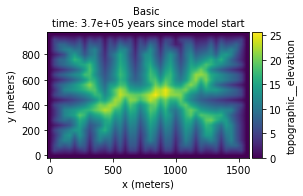
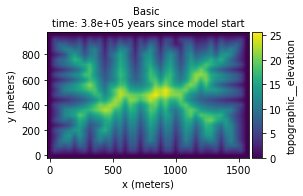
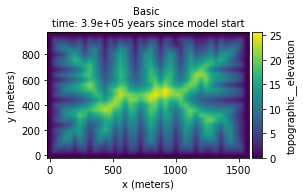
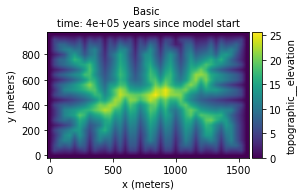
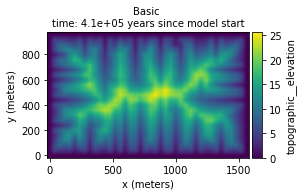
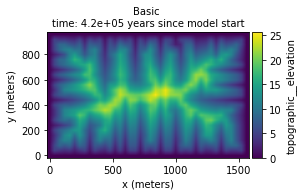
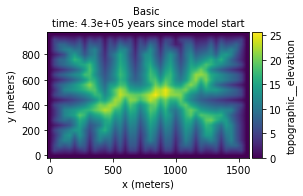
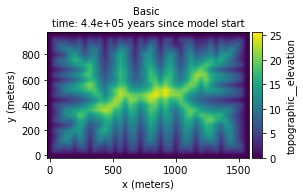
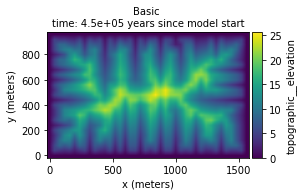
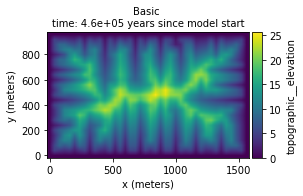
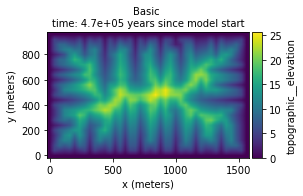
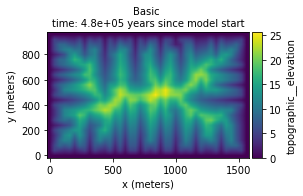
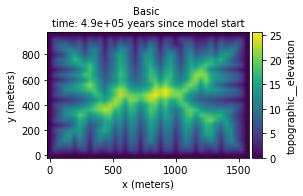
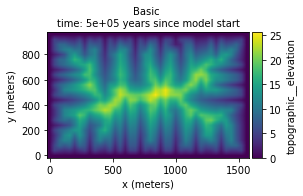

In [29]:
hvds_topo2 = hv.Dataset(ds2.topographic__elevation)
topo2 = hvds_topo2.to(hv.Image, ['x', 'y'],
                    label='Basic').options(interpolation='bilinear',
                                           cmap='viridis',
                                           colorbar=True)
topo2.opts(fontsize={
    'title': 10, 
    'labels': 10, 
    'xticks': 10, 
    'yticks': 10,       
    'cticks': 10,
})
topo2

# Let's make a movie
First, we make an image for each output interval.

In [33]:
from landlab import imshow_grid

filenames = []
curT = 0
for i in range(ds2.topographic__elevation.shape[0]):
    curT+=basic2.output_interval
    filename = "temp_output."+str(i)+".png"
    imshow_grid(basic2.grid, ds2.topographic__elevation.values[i, :, :], cmap="viridis", limits=(0, 25), output=filename,
               plot_name=str(curT) + ' model years')
    filenames.append(filename)    


<Figure size 432x288 with 0 Axes>

Finally we compile the images into a gif.

In [34]:
with imageio.get_writer("terrainbento_example.gif", mode="I") as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

Delete data

In [35]:
basic2.remove_output_netcdfs()
os.remove('mean_elevation.txt')

NameError: name 'WindowsError' is not defined

## Next Steps

- We recommend you review the [terrainbento manuscript](https://www.geosci-model-dev.net/12/1267/2019/).

- There are three additional introductory tutorials: 

    1) [Introduction terrainbento](Introduction_to_terrainbento.ipynb) 
    
    2) [Introduction to boundary conditions in terrainbento](introduction_to_boundary_conditions.ipynb)
    
    3) **This Notebook**: [Introduction to output writers in terrainbento](introduction_to_output_writers.ipynb). 
    
    
- Five examples of steady state behavior in coupled process models can be found in the following notebooks:

    1) [Basic](../coupled_process_elements/model_basic_steady_solution.ipynb) the simplest landscape evolution model in the terrainbento package.

    2) [BasicVm](../coupled_process_elements/model_basic_var_m_steady_solution.ipynb) which permits the drainage area exponent to change

    3) [BasicCh](../coupled_process_elements/model_basicCh_steady_solution.ipynb) which uses a non-linear hillslope erosion and transport law

    4) [BasicVs](../coupled_process_elements/model_basicVs_steady_solution.ipynb) which uses variable source area hydrology

    5) [BasisRt](../coupled_process_elements/model_basicRt_steady_solution.ipynb) which allows for two lithologies with different K values